# Regression - Interpretation

## Exercise 1: Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as sc
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# exercise 1
data = pd.read_csv('../data/tennis.csv')#loading data by pandas as csv file
df = data.copy()#make copy from original data
#df.head(3)

In [3]:
df.dropna(inplace=True)#dropping the invalid(null) data
#df.info()

In [4]:
df[['opponent','score', 'win', 'player1 total points total', 'player1 total points won', 'player2 total points won']].head(3)

,opponent,score,win,player1 total points total,player1 total points won,player2 total points won
0,Andre Agassi (USA),"L 3-6, 2-6",False,103.0,41.0,62.0
1,Guillaume Raoux (FRA),"W 6-2, 6-2",True,106.0,65.0,41.0
2,Richard Fromberg (AUS),"W 6-1, 7-6(5)",True,148.0,79.0,69.0


In [5]:
sc.ttest_ind(df['player2 total points won'], df['player1 total points won'])

Ttest_indResult(statistic=-10.142736499527302, pvalue=1.2909773137512344e-23)

In [6]:
#x1 = pd.DataFrame(df['player2 total points won'])
#x1 = sm.add_constant(x1)
#y1 = df['player1 total points won']
#model = sm.OLS(y1, x1).fit()
#model.summary()

In [7]:
x1 = pd.DataFrame(df['player2 total points won'])
#x1 = sm.add_constant(x1)
y1 = df['player1 total points won']
model = sm.OLS(y1, x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player1 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          3.173e+04
Date:                      Fri, 24 Jun 2022   Prob (F-statistic):                        0.00
Time:                              22:31:09   Log-Likelihood:                         -4262.4
No. Observations:                      1016   AIC:                                      8527.
Df Residuals:                          1015   BIC:                                      8532.
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player2 total points won     1.1257      0.006    178.124      0.000       1.113       1.138
==============================================================================
Omnibus:                       71.489   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.456
Skew:                          -0.707   Prob(JB):                     2.78e-19
Kurtosis:                       3.148   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

     according to pvalue<<0.05, there is statistically significant difference between 
     total points recorded by Federer and opponents,
     Ttest<0 shows Federer scores more than others .
     even with better R-squared, we should keep the constant.
     we don't want to have zero for y when the coefficient got zero.
     in these points recorded in table ,opponents have not had total points more than federer 
     so with constant we can predict closer points to actual trend.

In [8]:
#https://www.statsmodels.org/0.8.0/gettingstarted.html
sm.stats.linear_rainbow(model) #(f.statisctic, p-value)

(1.2889231707238675, 0.002162183204317708)

In [9]:
#print(sm.stats.linear_rainbow.__doc__)

## Exercise 2: College admissions

Using the `college.csv` dataset, answer the following:

1. Do private schools see more admissions overall? Hint: use a binary explanatory variable for `Private`

2. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

In [10]:
# exercise 2
data = pd.read_csv('../data/college.csv')#loading Data
dfc = data.copy()
dfc.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [11]:
dfc['Private'] =[1 if x=='Yes' else 0 for x in dfc['Private']]# pd.get_dummies(dfc.Private)
#due to replicated data, it should eb classified for No = 0, Yes = 1

In [12]:
dfc.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Private', ylabel='Accept'>

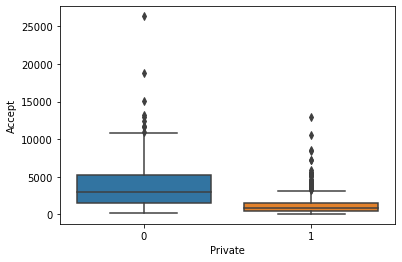

In [13]:
sns.boxplot(dfc.Private, dfc.Accept)#to show what percentage belong to each one

<AxesSubplot:>

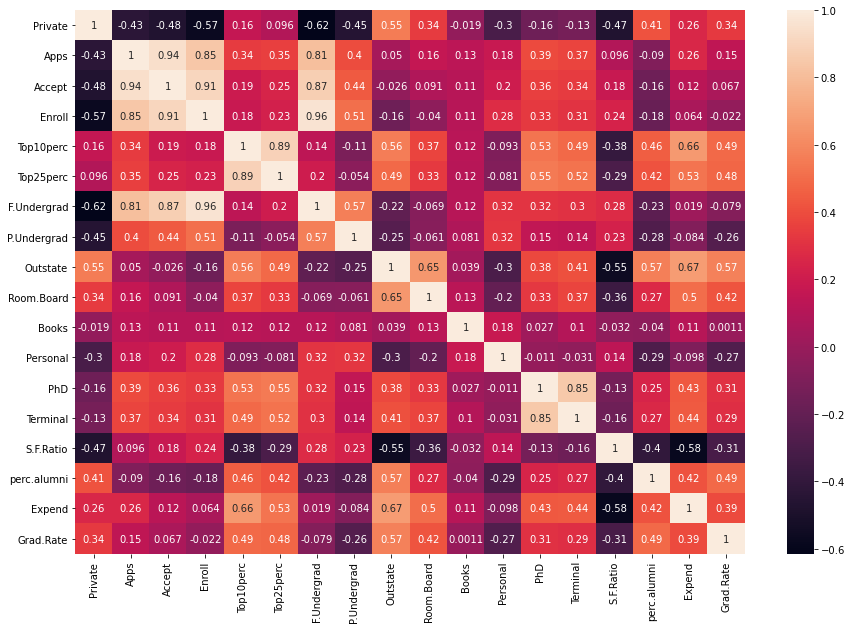

In [14]:
plt.figure(figsize=(15, 10)) #finding correlation
sns.heatmap(dfc.corr(), annot=True)

In [15]:
sc.ttest_ind(dfc.loc[dfc.Private==0]['Accept'], dfc.loc[dfc.Private==1]['Accept'])

Ttest_indResult(statistic=15.037175252579372, pvalue=4.953661998309235e-45)

Do private schools see more admissions overall?

>due to pvalue<<0.05, there is statistically significant difference on mean of two colleges. and ttest>0 so the mean of public college is more than private section in acceptance of students..


Is the relation between Top10perc and Top25perc best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? 
How would you select for the best of these model specifications?
>according the heatmap ther is 89%correlation


In [30]:
prc_10 = pd.DataFrame(dfc.Top10perc)#to be dataframe
prc_10 = sm.add_constant(prc_10)
prc_25 = dfc.Top25perc#response variable
sc.ttest_ind(prc_10, prc_25)#f.stats and pvalue

Ttest_indResult(statistic=array([-77.1248937 , -29.67844368]), pvalue=array([0.00000000e+000, 1.09284517e-153]))

In [31]:
prc_10s = sm.add_constant(pd.concat((prc_10, prc_10**2, prc_10**3), axis=1))#adding square term to better fitting as seen in pvalue
sc.ttest_ind(prc_10s, prc_25)

Ttest_indResult(statistic=array([-77.1248937 , -29.67844368, -77.1248937 ,  19.04956692,
       -77.1248937 ,  12.44348899]), pvalue=array([0.00000000e+000, 1.09284517e-153, 0.00000000e+000, 7.16946669e-073,
       0.00000000e+000, 5.95783769e-034]))

In [32]:
est_clg = sm.OLS(prc_25, prc_10s).fit()
# fitting model on predictor with square term which is explaining dependent variable far better
fitted_25 = est_clg.predict(prc_10s)

In [33]:
est_clg1 = sm.OLS(prc_25, prc_10).fit()# fitting model on predictor without square term
fitted1_25 = est_clg1.predict(prc_10)

C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


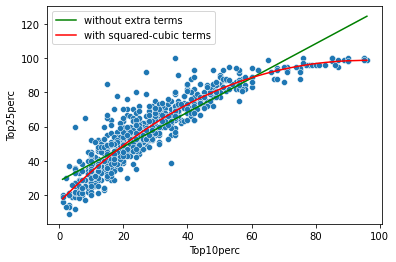

In [34]:
sns.scatterplot(dfc.Top10perc, dfc.Top25perc)#scatter plot for actual data
sns.lineplot(dfc.Top10perc, fitted1_25, color='green', label='without extra terms')
sns.lineplot(dfc.Top10perc, fitted_25, color='red', label='with squared-cubic terms')
plt.legend()

C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Top10perc', ylabel='Top25perc'>

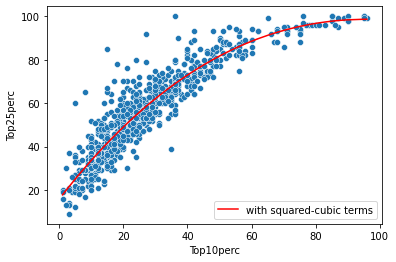

In [35]:
sns.scatterplot(prc_10s.iloc[:,1], prc_25)#after adding square term 
sns.lineplot(prc_10s.iloc[:,1], fitted_25, color='red', label='with squared-cubic terms')

>>adding constant prevented overfitting and the prediction proporly follow the actual trend.


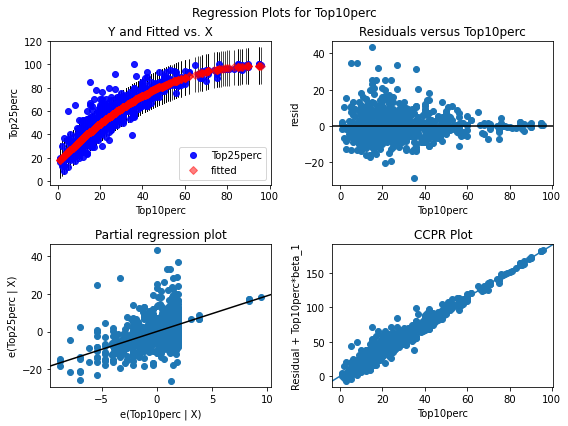

In [37]:
fig0 = plt.figure(figsize=(8, 6))
fig0 = sm.graphics.plot_regress_exog(est_clg, 'Top10perc', fig=fig0)


     regarding the figures, square term worked efficiently. 
     first figure shows cleary the goodness of fitting
     second figure on (top-right) shows the independent variable varaince around the resedual errors 
     third figure on (down-right) denoting homoscedasticity without change in errors variance
     here we do not need the intercept, because when there is no 10percent of course
     there is nolonger the 25percent as well. But the intercept helped in goodness of fitting provided
     the smooth trend followed the actual response variable.


## Exercise 3: Auto prediction

Using the auto.csv dataset, perform a simple linear regression with mpg as the response variable and horsepower as the predictor. Answer the following:

i. Is there a relationship between the predictor and the response?

ii. How strong is the relationship between the predictor and the response?

iii. Is the relationship between the predictor and the response positive or negative?

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

v. Make a regression plot the response and the predictor.

In [221]:
# exercise 3
data = pd.read_csv('../data/auto.csv', sep='\s+') #loading data and removing any unwanted character between data
dfa = data.copy()

dfa.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,-------------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite


In [243]:
dfa['horsepower'] = pd.to_numeric(dfa.horsepower, errors='coerce')
#converting from categorial data to contiues data, also the unknown data set to NAN by coerce argument
dfa['mpg'] = pd.to_numeric(dfa['mpg'], errors='coerce')
#dfa['horsepower'].isna().sum(), dfa['mpg'].isna().sum()#check for having Nan data

In [241]:
#dfa = dfa.dropna()#dropping null value

In [242]:
#dfa['horsepower'].isna().sum(), dfa['mpg'].isna().sum()

In [225]:
mpg = dfa.mpg  # cosidered as response variable
horsepower = pd.DataFrame(dfa['horsepower'])#considered as explanatory variable
horsepower = sm.add_constant(horsepower)
est = sm.OLS(mpg, horsepower).fit() #fitted by OLS
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           7.03e-81
Time:                        14:40:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i)  is there a relationship between the predictor and the response?

there is relationship because: coefficient is :
-0.1578, pvalue=0.000<0.05 
coefficient is nonzero as mentioned,



ii. How strong is the relationship between the predictor and the response?

    R-squared is 0.606 which is acceptable as a precise prediction.
    coefficient is -0.15 and from heatmap we can see that it is -0.5.

iii. Is the relationship between the predictor and the response positive or negative?

     negative realtionship because of negative sign 

In [252]:
#iv. What is the predicted mpg associated with a horsepower of 98?

#est.get_prediction((1,98)).summary_frame(alpha=0.05) # alpha = significance level for confidence interval
# mean_ci refers to the confidence interval and obs_ci refers to the prediction interval.


est.predict((1,98))

array([24.46707715])

#iv)what are the associated 95 % confidence and prediction intervals ?

         %25 to 95%   ======>  -0.171 : -0.145

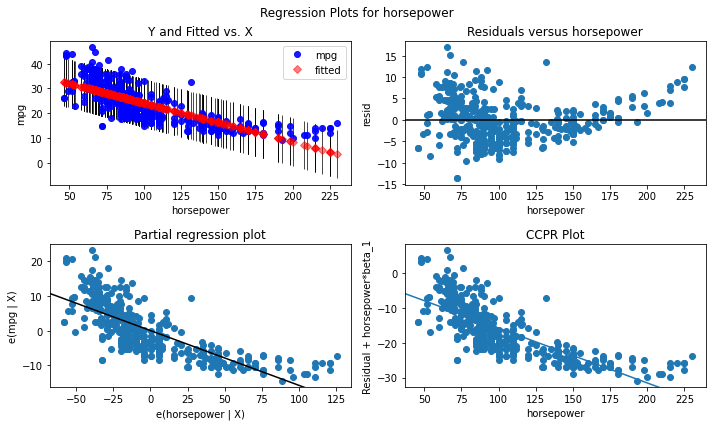

In [236]:
#v. regression plot:

fig = plt.figure(figsize=(10, 6))
fig = sm.graphics.plot_regress_exog(est, 'horsepower', fig=fig)

In [253]:
#sm.stats.linear_rainbow(est)

## Exercise 4: Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

i)Is there a relationship between the predictors and the response?

In [351]:
#https://www.statology.org
vif = pd.DataFrame()# to verify the multicolinearity by variance inflation factor (VIF)
vif['VIF'] = [varianc_inflation_factor(xa.values, i) for i in range(xa.shape[1])]
vif['variable'] = xa.columns
vif
#vif shows predictors with vif more than 5 makes our coeficient and their pvalue unreliable.
#here just 'year', 'origin', 'acceleration' are moderate correlated which could be used independently.
#others should be combined or removed from coefficients' list

,VIF,variable
0,763.557531,const
1,10.737535,cylinders
2,21.836792,displacement
3,9.943693,horsepower
4,10.831260,weight
5,2.625806,acceleration
6,1.244952,year
7,1.772386,origin


<AxesSubplot:>

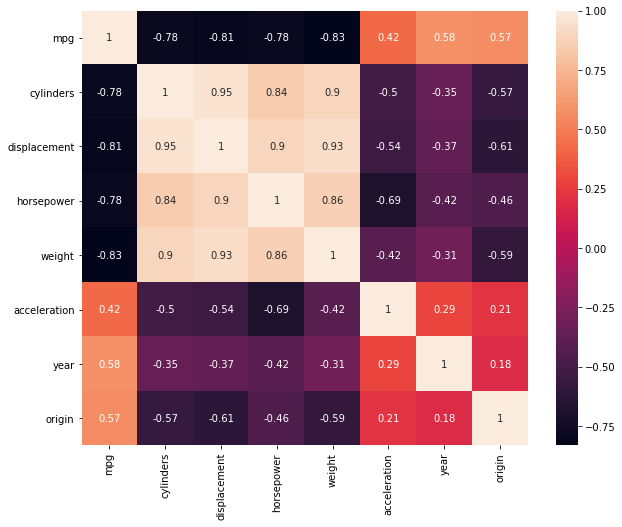

In [229]:
#above verification has been visualized on heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dfa.corr(), annot=True)

In [352]:
# ii. Which predictors appear to have a statistically significant relationship to the response?
mpg = dfa.mpg
xa = dfa[['acceleration', 'year', 'origin']]
xa = sm.add_constant(xa)
modela = sm.OLS(mpg, xa).fit()
modela.summary()

#significant coefficient is "year" with amount of 0.7508  and pvalue:0
#all data in the summary sounds well but the pvalue because of 
#some dependencies on explanatories variables are not reliable.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     187.3
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           4.36e-75
Time:                        21:55:01   Log-Likelihood:                -1185.7
No. Observations:                 392   AIC:                             2379.
Df Residuals:                     388   BIC:                             2395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -63.2873      5.249    -12.056      0.000     -73.608     -52.967
acceleration     0.5685      0.097      5.840      0.000       0.377       0.760
year             0.9363      0.072     12.927      0.000       0.794       1.079
origin           4.2850      0.324     13.209      0.000       3.647       4.923
==============================================================================
Omnibus:                       14.436   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.460
Skew:                           0.480   Prob(JB):                     0.000439
Kurtosis:                       2.842   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the best correlation belongs to 'origin' then 'year' with coefficients of 4.2, 0.9 respectively with pvalue less than 0.05.
there is statistically significant difference between predictors and response variables could be defined by them.

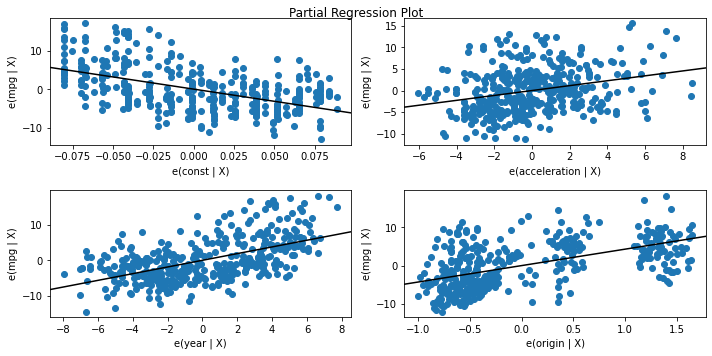

In [353]:
fig = plt.figure(figsize=(10, 5))
fig = sm.graphics.plot_partregress_grid(modela, fig=fig)
#almost there  is no heteroscedasticity and the predictors could explain the variance of their errors 

iii. What does the coefficient for the year variable suggest?
>0.9363  with pvalue 0.000<significant value(0.05) #but we firstly have to solve the hetrosceddasticity 

In [358]:
#https://tedboy.github.io/statsmodels_doc/generated/statsmodels.stats.diagnostic.html
#Breusch-Pagan test using het_ breuschpagan function

htest = smd.het_breuschpagan(resid=modela.resid, exog_het=xa)
print("lm:", htest[0], "lm_pvalue:", htest[1], "f-statistic:", htest[2], "f_pvalue:", htest[3])

#the pvalue is lees than significant value so the null hypothese could be rejected so there is no heteroscedasticity.

lm: 13.188497044539833 lm_pvalue: 0.004246205083732906 f-statistic: 4.502799601171839 f_pvalue: 0.004039045208233344


In [357]:
wtest = smd.het_white(resid=modela.resid, exog=xa)#white test to diagnose the heteroscedasticity
print("lm:", wtest[0], "lm_pvalue:", wtest[1], 'f-statistic:', wtest[2], 'f_pvalue:', wtest[3])
#the pvalue is lees than significant value so the null hypothese could be rejected so there is no heteroscedasticity.

lm: 26.956961612491206 lm_pvalue: 0.0014218797972784343 f-statistic: 3.13435167701463 f_pvalue: 0.0011719175697575313


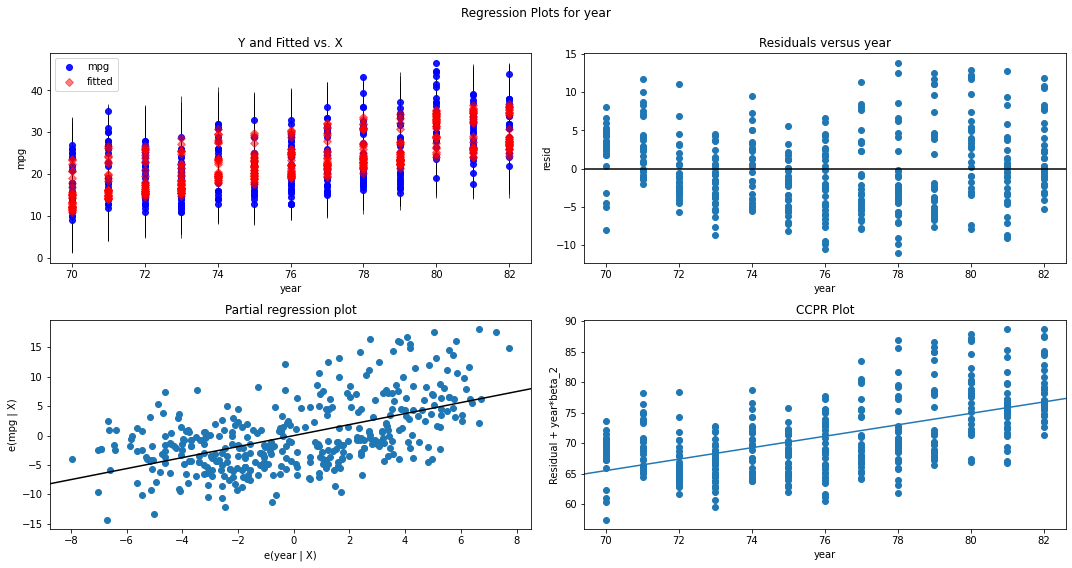

In [359]:
#regression plot after solving the dependency problem by removing the highly corrolated together.
fig_1 = plt.figure(figsize=(15, 8))
fig_1 = sm.graphics.plot_regress_exog(modela, 'year', fig=fig_1) #if i don't use fig, it will be duplicated

## Exercise 5: Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [19]:
# exercise 5
data = pd.read_csv('../data/CarSeats.csv')
dcars = data.copy()
dcars.head(5)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [372]:
dcars['US'] = pd.get_dummies(dcars['US'], drop_first=True)#convert to binary
dcars['Urban'] = pd.get_dummies(dcars['Urban'], drop_first=True)#convert to binary  
dcars['ShelveLoc'] = pd.get_dummies(dcars['ShelveLoc'], drop_first=True)

In [373]:
dcars['US'] = pd.to_numeric(dcars.US, errors='coerce')#convert to numeric not categorial data
dcars.Urban = pd.to_numeric(dcars.Urban, errors= 'coerce')

<AxesSubplot:>

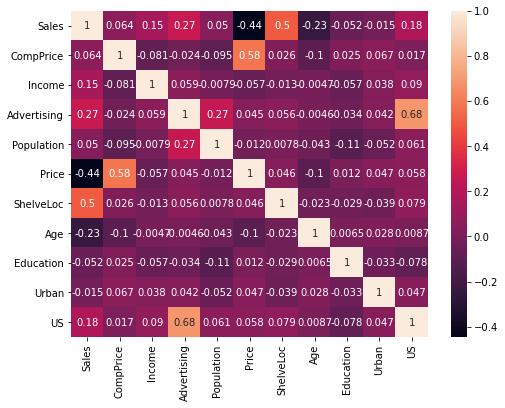

In [374]:
plt.figure(figsize=(8, 6))
sns.heatmap(dcars.corr(), annot=True)#to check correlations

In [375]:
features = dcars[['Price', 'Urban', 'US']] #explanatories variables
#features = sm.add_constant(features)#adding constant
vif = pd.DataFrame()# to verify the multicolinearity by variance inflation factor (VIF)
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['variable'] = features.columns
vif
#vif shows predictors with vif less than 5 makes our coeficient and their pvalue almost reliable.
#they have moderate correlated which could be used independently.

,VIF,variable
0,4.545363,Price
1,3.205793,Urban
2,2.728046,US


In [377]:
#1. Fit a multiple regression model to predict Sales using Price, Urban, and US.
dcars1 = dcars[['Price', 'Urban', 'US', 'Sales']]
fitted = smf.ols(formula=("Sales ~ US + Urban + Price"), data=dcars1).fit()  #fit model on OLS
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           2.39e-23
Time:                        22:28:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
US             1.2006      0.259      4.635      0.000       0.691       1.710
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [470]:
htest1 = smd.het_breuschpagan(resid=fitted.resid, exog_het=dcars1.iloc[:,1:])
print("lm:", htest1[0], "lm_pvalue:", htest1[1], "f-statistic:", htest1[2], "f_pvalue:", htest1[3])

#the pvalue is lees than significant value so the null hypothese could be rejected so there is no heteroscedasticity.

lm: 141.70609476700298 lm_pvalue: 1.6939964478281218e-31 f-statistic: 72.60117058221282 f_pvalue: 1.881661355078686e-37


<AxesSubplot:ylabel='Count'>

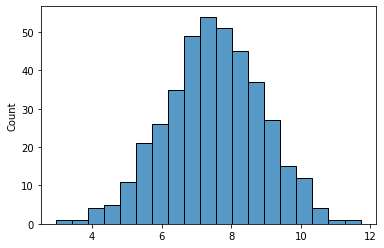

In [451]:
sns.histplot(fitted.predict())

2. Provide an interpretation of each coefficient in the model.Be careful—some of the variables in the model are qualitative!

        a) all coefficients except "Urban" are acceptable as nonzero coefficient because 
        thier pvalue are less then significant value(0.05)

        b) R-squared for qualitative data in this range is acceptable and shows to have more or less a close prediction

        c) skew is low denoting symmetric data in normal distribution, though the Prob(Omnibus)(0.713)
        is not close to 0 for perfect match on normal distribution. 


3)For which of the predictors can you reject the null hypothesis H0 : βj = 0?
    
    regarding the tabel, beacuse of high pvalue(>0.05), we failed in rejction of null hypotheses(the coefficient is zero). 
    so"Urban" should be omitted and would be considered as zero.

4)On the basis of your response to the previous question,
fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [449]:
dcars2 = dcars[['Sales', 'US', 'Price']]
fitted2 = smf.ols(formula='(Sales ~ US + Price)', data=dcars2).fit()
fitted2.summary()
#regarding to summary, we should remove 'Population' from the coeffiecients' list

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           2.66e-24
Time:                        23:28:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US             1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [471]:
#Breusch-Pagan test using het_ breuschpagan function

htest = smd.het_breuschpagan(resid=fitted2.resid, exog_het=dcars2.iloc[:,1:])
print("lm:", htest[0], "lm_pvalue:", htest[1], "f-statistic:", htest[2], "f_pvalue:", htest[3])

#the pvalue is lees than significant value so the null hypothese could be rejected so there is no heteroscedasticity.

lm: 136.30087789943158 lm_pvalue: 1.7147519216551721e-31 f-statistic: 102.85917710276831 f_pvalue: 9.787906968465153e-37


5)How well do the models in 1 and 4 fit the data? Explain which statistics show the difference?

        + the previous regression just had the multicolinearity not having effect on 
          fitting precesion so after removing the 'Urban, there is no big difference seen in the last fitted model
        
        + the models in both fitting doing well and their prediction is almost close to true value as response variable.
        
        + the figure plotted below could show clearly the linear relation between fitted value and true value
        
        + in regression plots shown the homogenity in distribution around the residual trend confirmed the homoscedasticity.
          also by het_ breuschpagan test, it is verified for heteroscedasticity approving above result.
        
        

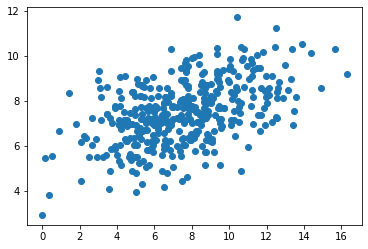

In [456]:
yfit2 = fitted2.predict(dcars2.iloc[:,1:])
plt.scatter(dcars2['Sales'], yfit2)

#almost predicted and true value they are in the same level and ther is no obvious difference to underestimat the result.

<AxesSubplot:ylabel='Count'>

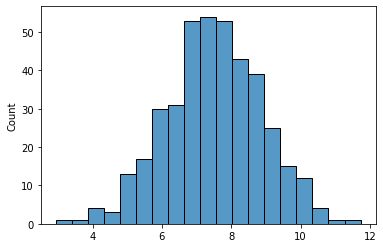

In [452]:
sns.histplot(fitted2.predict())

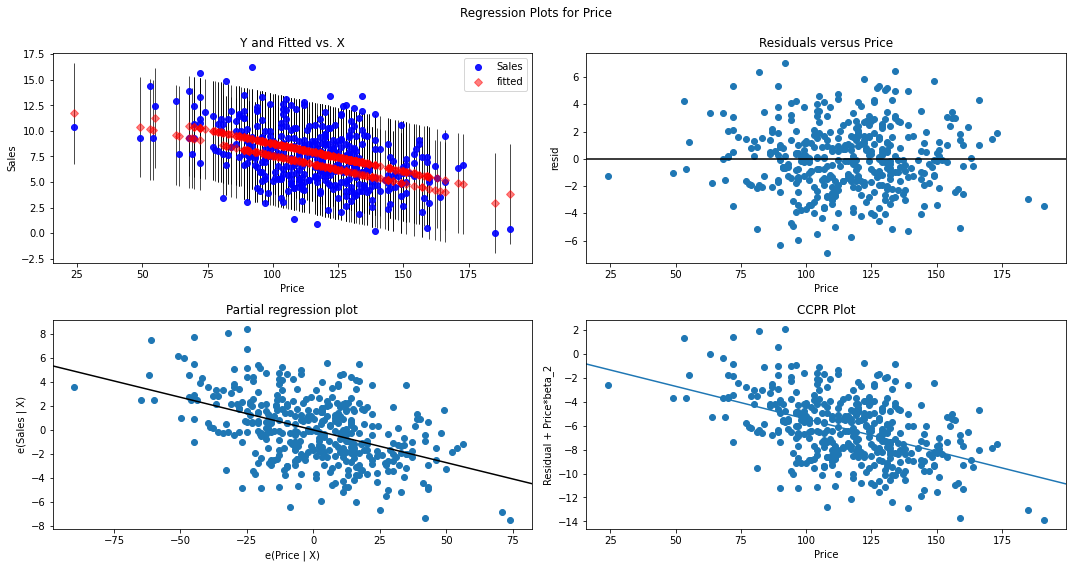

In [457]:
fig2= plt.figure(figsize=(15, 8))
fig2= sm.graphics.plot_regress_exog(fitted2, 'Price', fig=fig2)